## 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## 데이터 불러오기

In [2]:
# 전체 평균 데이터
lsv_path = './210715_구성원LSV(18-20).xlsx'
lsv18 = pd.read_excel(lsv_path, sheet_name=2)
lsv19 = pd.read_excel(lsv_path, sheet_name=1)
lsv20 = pd.read_excel(lsv_path, sheet_name=0)

In [26]:
# 항목별 평균 데이터
lsv_qgroup_path = './210715_구성원LSV(18-20).xlsx'
lsv18_group_mean = pd.read_excel(lsv_qgroup_path, sheet_name=5)
lsv19_group_mean = pd.read_excel(lsv_qgroup_path, sheet_name=4)
lsv20_group_mean = pd.read_excel(lsv_qgroup_path, sheet_name=3)

## 함수 모음

In [5]:
def lsv_groupby(lsv,year):
    now = datetime.datetime.now()
    lsv_G = lsv.groupby(lsv['num'])
    lsv_G_mean = lsv_G.mean()
    new_lsv = pd.DataFrame({
        'num':lsv_G_mean.index.values,
        'mean':lsv_G_mean.values.ravel()
    })
    #new_lsv.to_excel('{}_LSV{}.xlsx'.format(now.strftime('%Y%m%d')[2:], str(year)[2:]), index=False)
    return new_lsv

In [4]:
def lsv_df(lsv_mean, year):
    lsv_df = pd.DataFrame()
    iqr = np.percentile(lsv_mean['mean'],75) - np.percentile(lsv_mean['mean'],25)
    q1 = np.percentile(lsv_mean['mean'],25)
    q2 = np.percentile(lsv_mean['mean'],50)
    q3 = np.percentile(lsv_mean['mean'],75)

    lsv_df['최대'] = [max(lsv_mean['mean'])]
    lsv_df['최소'] = [min(lsv_mean['mean'])]
    lsv_df['평균'] = [lsv_mean['mean'].mean()]
    lsv_df['최저한계치'] = [q1-(1.5*iqr)]
    lsv_df['제1사분위'] = [q1]
    lsv_df['제2사분위'] = [q2]
    lsv_df['제3사분위'] = [q3]
    lsv_df.index = ['{}년도 구성원 LSV'.format(year)]
    
    return lsv_df

In [24]:
def lsv_count(lsv_mean, year):
    lsv_df = pd.DataFrame()
    iqr = np.percentile(lsv_mean['mean'],75) - np.percentile(lsv_mean['mean'],25)
    q1 = np.percentile(lsv_mean['mean'],25)
    q2 = np.percentile(lsv_mean['mean'],50)
    q3 = np.percentile(lsv_mean['mean'],75)
    
    lsv_df['총 인원'] = [len(lsv_mean['mean'])]
    lsv_df['평균 이상'] = [len(lsv_mean['mean'][lsv_mean['mean']>lsv_mean['mean'].mean()])]
    lsv_df['평균 이하'] = [len(lsv_mean['mean'][lsv_mean['mean']<lsv_mean['mean'].mean()])]
    lsv_df['1분위'] = [len(lsv_mean['mean'][lsv_mean['mean']<q1])]
    lsv_df['2분위'] = [len(lsv_mean['mean'][(lsv_mean['mean']>=q1) & (lsv_mean['mean']<q2)])]
    lsv_df['3분위'] = [len(lsv_mean['mean'][(lsv_mean['mean']>=q2) & (lsv_mean['mean']<q3)])]
    lsv_df['4분위'] = [len(lsv_mean['mean'][lsv_mean['mean']>=q3])]
    lsv_df.index = ['{}년도 구성원 LSV 구간별 인원'.format(year)]
    
    return lsv_df

In [14]:
def lsv_boxplot(new_lsv,year):
    plt.figure(figsize=(3,9))
    plt.boxplot([new_lsv['mean']],
                labels=['{}LSV'.format(str(year)[2:])],
               showmeans=True)
    plt.show()
    return None

## 2018년 ~ 2020년 LSV 전체 평균 

### 2018년 LSV 전체 평균
> - 질문 항목별 구분 없이 전체 질문에 대해 평균 구하고, 동일사번에 대해 최종 평균 구함

In [ ]:
# 사번별 총 평균
lsv18_group = lsv_groupby(lsv18,2018)

In [8]:
# 사분위 데이터 프레임
lsv18_df = lsv_df(lsv18_group,2018)
lsv18_df

,최대,최소,평균,최저한계치,제1사분위,제2사분위,제3사분위
2018년도 구성원 LSV,7.0,1.882353,5.425038,3.323799,4.972579,5.558824,6.071765


In [25]:
# 사분위 구간별 인원
lsv18_count = lsv_count(lsv18_group,2018)
lsv18_count

,총 인원,평균 이상,평균 이하,1분위,2분위,3분위,4분위
2018년도 구성원 LSV 구간별 인원,1048,604,444,262,261,263,262


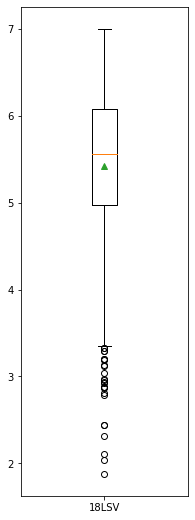

In [15]:
# 박스플랏
lsv_boxplot(lsv18_group, 2018)

### 2019년 LSV 전체 평균
> - 질문 항목별 구분 전체 질문에 대해 평균 구하고, 동일사번에 대해 최종 평균 구함

In [27]:
# 사번별 총 평균
lsv19_group = lsv_groupby(lsv19,2019)

In [28]:
# 사분위 데이터 프레임
lsv19_df = lsv_df(lsv19_group,2019)
lsv19_df

,최대,최소,평균,최저한계치,제1사분위,제2사분위,제3사분위
2019년도 구성원 LSV,5.0,1.593838,3.76191,2.25569,3.422837,3.814815,4.200936


In [29]:
# 사분위 구간별 인원
lsv19_count = lsv_count(lsv19_group,2019)
lsv19_count

,총 인원,평균 이상,평균 이하,1분위,2분위,3분위,4분위
2019년도 구성원 LSV 구간별 인원,1187,644,543,297,296,297,297


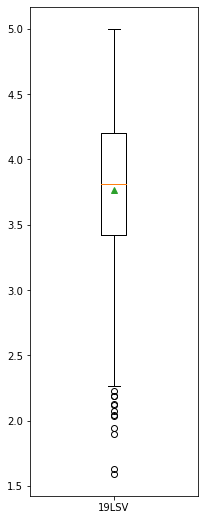

In [30]:
# 박스플랏
lsv_boxplot(lsv19_group, 2019)

### 2020년 LSV 전체 평균
> - 질문 항목별 구분 전체 질문에 대해 평균 구하고, 동일사번에 대해 최종 평균 구함

In [31]:
# 사번별 총 평균
lsv20_group = lsv_groupby(lsv20,2020)

In [32]:
# 사분위 데이터 프레임
lsv20_df = lsv_df(lsv20_group,2020)
lsv20_df

,최대,최소,평균,최저한계치,제1사분위,제2사분위,제3사분위
2020년도 구성원 LSV,5.0,1.826667,4.008524,2.616667,3.7,4.095238,4.422222


In [33]:
# 사분위 구간별 인원
lsv20_count = lsv_count(lsv20_group,2020)
lsv20_count

,총 인원,평균 이상,평균 이하,1분위,2분위,3분위,4분위
2020년도 구성원 LSV 구간별 인원,1153,660,493,288,288,288,289


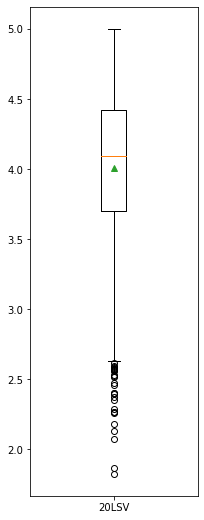

In [34]:
# 박스플랏
lsv_boxplot(lsv20_group, 2020)

## 2018년 ~ 2020년 LSV 질문 항목별 평균

### 2018년 LSV 질문 항목별 평균
> - 질문 항목별로 구분하여 평균을 구하고 그 평균에 대해 전체 평균 구한 후 동일사번에 대해 최종 평균 구함

In [35]:
# 사번별 총 평균
lsv18_Qgroup = lsv_groupby(lsv18_group_mean,2018)

In [36]:
# 사분위 데이터 프레임
lsv18_group_df = lsv_df(lsv18_Qgroup,2018)
lsv18_group_df

,최대,최소,평균,최저한계치,제1사분위,제2사분위,제3사분위
2018년도 구성원 LSV,7.0,1.890741,5.434663,3.342535,4.977431,5.573451,6.067361


In [37]:
# 사분위 구간별 인원
lsv18_group_count = lsv_count(lsv18_Qgroup,2018)
lsv18_group_count

,총 인원,평균 이상,평균 이하,1분위,2분위,3분위,4분위
2018년도 구성원 LSV 구간별 인원,1048,605,443,262,262,262,262


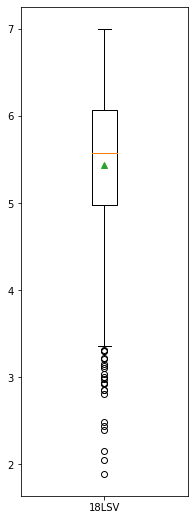

In [38]:
# 박스플랏
lsv_boxplot(lsv18_Qgroup, 2018)

### 2019년 LSV 질문 항목별 평균
> - 질문 항목별로 구분하여 평균을 구하고 그 평균에 대해 전체 평균 구한 후 동일사번에 대해 최종 평균 구함

In [39]:
# 사번별 총 평균
lsv19_Qgroup = lsv_groupby(lsv19_group_mean,2019)

In [40]:
# 사분위 데이터 프레임
lsv19_group_df = lsv_df(lsv19_Qgroup,2019)
lsv19_group_df

,최대,최소,평균,최저한계치,제1사분위,제2사분위,제3사분위
2019년도 구성원 LSV,5.0,1.602778,3.763714,2.266667,3.4225,3.817284,4.193056


In [41]:
# 사분위 구간별 인원
lsv19_group_count = lsv_count(lsv19_Qgroup,2019)
lsv19_group_count

,총 인원,평균 이상,평균 이하,1분위,2분위,3분위,4분위
2019년도 구성원 LSV 구간별 인원,1187,644,543,297,296,296,298


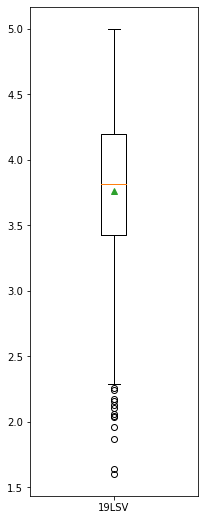

In [42]:
# 박스플랏
lsv_boxplot(lsv19_Qgroup, 2019)

### 2020년 LSV 질문 항목별 평균
> - 질문 항목별로 구분하여 평균을 구하고 그 평균에 대해 전체 평균 구한 후 동일사번에 대해 최종 평균 구함

In [43]:
# 사번별 총 평균
lsv20_Qgroup = lsv_groupby(lsv20_group_mean,2020)

In [44]:
# 사분위 데이터 프레임
lsv20_group_df = lsv_df(lsv20_Qgroup,2020)
lsv20_group_df

,최대,최소,평균,최저한계치,제1사분위,제2사분위,제3사분위
2020년도 구성원 LSV,5.0,1.658333,3.995822,2.554464,3.68,4.107407,4.430357


In [45]:
# 사분위 구간별 인원
lsv20_group_count = lsv_count(lsv20_Qgroup,2020)
lsv20_group_count

,총 인원,평균 이상,평균 이하,1분위,2분위,3분위,4분위
2020년도 구성원 LSV 구간별 인원,1153,665,488,288,288,288,289


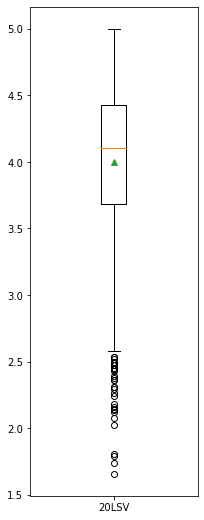

In [46]:
# 박스플랏
lsv_boxplot(lsv20_Qgroup, 2020)